In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = train.drop("label", axis = 1)
y = train["label"]

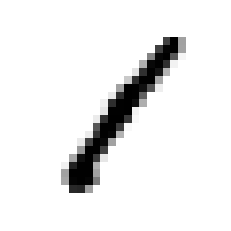

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
toDraw = np.array(X_train.iloc[0]).reshape(28,28)
plt.imshow(toDraw, cmap = "binary")
plt.axis("off")
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
ntrain, ntest = train_test_split(train, test_size=0.15, random_state=42)
ytrain = ntrain["label"]
ntrain = ntrain.drop("label", axis = 1)
ytest = ntest["label"]
ntest = ntest.drop("label", axis = 1)


In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(ntrain.astype(np.float64))

In [8]:
model_ridge = SGDClassifier()
model_ridge.fit(X_train_scaled,ytrain)


SGDClassifier()

In [9]:
test_scaled = scaler.fit_transform(ntest.astype(np.float64))

In [10]:
y_pred = model_ridge.predict(test_scaled)

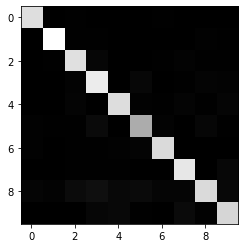

In [11]:
from sklearn.metrics import confusion_matrix
#y_pred = np.rint(y_pred)
cnf_mx = confusion_matrix(y_pred, ytest)
plt.imshow(cnf_mx, cmap = "gray")


1


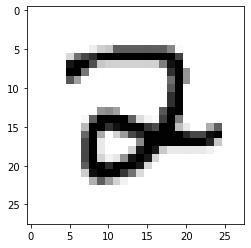

In [12]:
idx = 236
toDraw2 = np.array(test.iloc[idx]).reshape(28,28)
print(y_pred[idx])
plt.imshow(toDraw2, cmap = "binary")

In [13]:
accuracy = np.sum(y_pred==ytest)/y_pred.size
accuracy


0.903015873015873